<a href="https://colab.research.google.com/github/Despair1525/LinearRegression-Module/blob/main/HousePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#need file kaggle.json
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d smileymask/houseprice

houseprice.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
local_zip = 'houseprice.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/HousePriceinVN - HousePrice2.csv')

In [ ]:
df.columns

Index(['Date', 'địa chỉ', 'mặt tiền', 'đường vào', 'số tầng', 'số phòng  ngủ',
       'số phòng toilet', 'm^2', 'price'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.sort_values(by=['Date'])

,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price
1037,2021-01-10,"Đường Hòa Bình, Phường Yên Nghĩa, Hà Đông, Hà Nội",3.5,3.0,4.0,3.0,4.0,35.0,44.3 triệu/m²
1041,2021-01-10,"34, Đường An Dương Vương, Phúc Yên, Vĩnh Phúc",5.0,20.0,3.0,4.0,3.0,53.0,112.3 triệu/m²
3076,2021-01-10,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Hồ ...",NaN,NaN,3.0,4.0,5.0,84.0,148.8 triệu/m²
1042,2021-01-10,"Đường Nguyễn Văn Cừ, Phường Bồ Đề, Long Biên, ...",4.0,NaN,5.0,3.0,4.0,42.0,92.6 triệu/m²
1043,2021-01-10,"82, Đường Yên Lãng, Phường Láng Hạ, Đống Đa...",9.0,NaN,5.0,3.0,5.0,51.0,152.9 triệu/m²
...,...,...,...,...,...,...,...,...,...
1958,2021-10-10,"Đường Mễ Trì Hạ, Phường Mễ Trì, Nam Từ Liêm, H...",4.0,3.0,5.0,6.0,5.0,45.0,93.3 triệu/m²
1249,2021-10-10,"Đường Lê Quang Đạo, Nam Từ Liêm, Hà Nội.",4.0,3.0,4.0,2.0,4.0,32.0,106.2 triệu/m²
2819,2021-10-10,"Đường Yên Xá, Xã Tân Triều, Thanh Trì, Hà Nội",4.0,4.0,7.0,18.0,18.0,73.0,121.9 triệu/m²
2818,2021-10-10,"đường Trung Văn, Phường Trung Văn, Nam Từ Liêm...",6.3,2.5,6.0,14.0,14.0,50.0,158 triệu/m²


In [ ]:
# loại bỏ đi data dư thừa
df=df.dropna()
df=df.reset_index()
df.describe

<bound method NDFrame.describe of       index       Date  ...    m^2           price
0         3 2021-09-10  ...   67.5  214.8 triệu/m²
1         4 2021-09-10  ...   75.0   54.7 triệu/m²
2         6 2021-08-10  ...  117.0   51.3 triệu/m²
3         8 2021-08-10  ...  135.0   74.1 triệu/m²
4        10 2021-08-10  ...   34.0   79.4 triệu/m²
...     ...        ...  ...    ...             ...
1914   3356 2021-09-10  ...   47.0   63.4 triệu/m²
1915   3359 2021-09-10  ...   42.0  114.3 triệu/m²
1916   3361 2021-09-10  ...   32.0   83.1 triệu/m²
1917   3362 2021-09-10  ...   68.0   69.1 triệu/m²
1918   3363 2021-09-10  ...   90.0  122.2 triệu/m²

[1919 rows x 10 columns]>

In [ ]:
import re

# format lại cột Price 
for i in range(len(df)):
  price = df['price'][i]
  if price.find('triệu') != -1:
    num = re.findall(r"[-+]?\d*\.\d+|\d+", price)[0]
    df['price'][i] =num
  elif price.find('tỷ') != -1:
    num = float(re.findall(r"[-+]?\d*\.\d+|\d+", price)[0])
    num = (num*(10**9) / (df['m^2'][i])) 
    num /= (10**6)
    num=round(num,2)
    df['price'][i] = str(num)
  elif price.find('nghìn'):
    num = float(re.findall(r"[-+]?\d*\.\d+|\d+", price)[0])
    num = (num*(10**3))
    num /= (10**6)
    num=round(num,2)
    df['price'][i] = str(num)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price
0,3,2021-09-10,"Dự án Vinhomes Ocean Park Gia Lâm, Đường Ngọc ...",5.0,40.0,5.0,5.0,5.0,67.5,214.8
1,4,2021-09-10,"Dự án Wyndham Thanh Thủy, Đường Tỉnh Lộ 317, X...",5.0,24.0,4.0,3.0,4.0,75.0,54.7
2,6,2021-08-10,"Dự án Izumi City, Biên Hòa, Đồng Nai",8.0,60.0,3.0,4.0,4.0,117.0,51.3
3,8,2021-08-10,"Dự án Vinhomes Ocean Park Gia Lâm, Gia Lâm, Hà...",6.0,52.0,4.0,3.0,3.0,135.0,74.1
4,10,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4
...,...,...,...,...,...,...,...,...,...,...
1914,3356,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4
1915,3359,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3
1916,3361,2021-09-10,"Đường Hà Trì 2, Phường Hà Cầu, Hà Đông, Hà Nội",3.9,2.5,5.0,3.0,3.0,32.0,83.1
1917,3362,2021-09-10,"Đường Thạnh Lộc 29, Phường Thạnh Lộc, Quận 12,...",4.0,8.0,4.0,4.0,5.0,68.0,69.1


In [ ]:
df['price']=df['price'].astype('float')

In [ ]:
!kaggle datasets download -d smileymask/listcity # download danh sách các thành phố để lọc địa chỉ dựa trên thành phố

listcity.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
local_zip = 'listcity.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
df2=pd.read_csv('/content/listCity - Sheet1.csv')
listCity = df2['Thành phố'].tolist()

In [ ]:
print(listCity)

['Hà Nội', 'Hồ Chí Minh', 'hải Phòng', 'Cần thơ', 'Đà Nẵng ', 'Bà Rịa', 'Bạc Liêu', 'Bảo Lộc', 'Bắc Giang', 'Bắc Kạn', 'Bắc Ninh', 'Bến Tre', 'Biên Hòa', 'Buôn\nMa Thuột', 'Cà Mau', 'Cam Ranh', 'Cao Bằng', 'Cao Lãnh', 'Cẩm Phả', 'Châu Đốc', 'Đà Lạt', 'Điện\nBiên Phủ', 'Đông Hà', 'Đồng Hới', 'Đồng Xoài', 'Hà Giang', 'Hạ Long', 'Hà Tiên', 'Hà Tĩnh', 'Hải Dương', 'Hòa Bình', 'Hội An', 'Huế', 'Hưng Yên', 'Kon Tum', 'Lai Châu', 'Lạng Sơn', 'Lào Cai', 'Long Xuyên', 'Móng Cái', 'Mỹ Tho', 'Nam Định', 'Nha Trang', 'Ninh Bình', 'Phan Rang - Tháp Chàm', 'Phan Thiết', 'Phủ Lý', 'Phúc Yên', 'Pleiku', 'Quảng Ngãi', 'Quy Nhơn', 'Rạch Giá', 'Sa Đéc', 'Sầm Sơn', 'Sóc Trăng', 'Sơn La', 'Sông Công', 'Tam Điệp', 'Tam Kỳ', 'Tân An', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên', 'Thanh Hóa', 'Thủ Dầu Một', 'Trà Vinh', 'Tuy Hòa', 'Tuyên Quang', 'Uông Bí', 'Vị Thanh', 'Việt Trì', 'Vinh', 'Vĩnh Long', 'Vĩnh Yên', 'Vũng Tàu', 'Yên Bái', 'Thuận An', 'Dĩ An', 'Phú Quốc', 'Ngã Bảy', 'Long Khánh', 'Hồng Ngự', 'Gia Nghĩa'

In [ ]:
def checkLocate(listCity,locate): 
  check = 0
  for city in listCity:
    if city.lower() in locate.strip().lower():
      return city


In [ ]:
count=0
for i in range(len(df)):
  locate = df['địa chỉ'][i]
  city = checkLocate(listCity,locate)
  if city is not 0:
    try:
      df['city'][i] = city
    except:
      df['city']=""
      df['city'][i] = city

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df=df.dropna()
df=df.reset_index()

city
Biên Hòa         35
Bà Rịa           19
Bắc Giang         1
Bắc Ninh         13
Cam Ranh          5
Cần thơ           1
Dĩ An             5
Huế               4
Hà Nội         1216
Hà Tiên           1
Hòa Bình          1
Hưng Yên          3
Hạ Long           1
Hồ Chí Minh     400
Hội An            2
Lạng Sơn          1
Nam Định          3
Nha Trang        12
Phan Thiết       11
Phú Quốc          6
Phúc Yên          3
Quy Nhơn          2
Rạch Giá          1
Sầm Sơn           3
Thanh Hóa         6
Thuận An          5
Thủ Dầu Một      20
Tân An            5
Vinh              1
Vĩnh Long         1
hải Phòng        44
Đà Lạt           10
dtype: int64

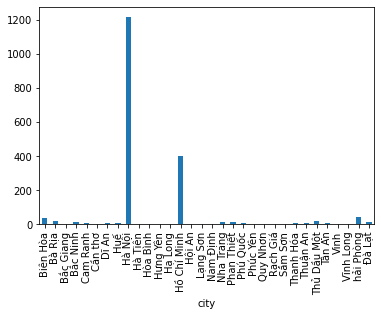

In [ ]:
city_count = df.groupby('city').size()
city_count.plot(kind='bar')
city_count

In [ ]:
dataframe = df[df['city']== 'Hà Nội']

In [ ]:
listColumn=dataframe.columns
dataframe =dataframe[listColumn[2::]].reset_index()

In [ ]:
!kaggle datasets download -d smileymask/quanhanoi

quanhanoi.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
local_zip = '/content/quanhanoi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
listQuan = pd.read_csv('/content/HaNoi quan - Sheet1.csv')

In [ ]:
danhSachQuan = listQuan['Tên gọi'].tolist()

In [ ]:
listQuan[(listQuan['Tên gọi']== 'Ba Đình')]['Thể loại hành chính'][0]

'Quận'

In [ ]:
def checkLocateInCity(listCity,locate,listQuan): 
  check = 0
  for city in listCity:
    if city.lower() in locate.strip().lower():
      return city

In [ ]:

for i in range(len(dataframe)):
  locate = dataframe['địa chỉ'][i]
  city = checkLocateInCity(danhSachQuan,locate,listQuan)
  if city is not 0:
    try:
      dataframe['locate'][i] = city
    except:
      dataframe['locate']=""
      dataframe['locate'][i] = city

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
dataframe = dataframe.dropna()
dataframe

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate
0,0,2021-09-10,"Dự án Vinhomes Ocean Park Gia Lâm, Đường Ngọc ...",5.0,40.0,5.0,5.0,5.0,67.5,214.8,Hà Nội,Gia Lâm
1,2,2021-08-10,"Dự án Vinhomes Ocean Park Gia Lâm, Gia Lâm, Hà...",6.0,52.0,4.0,3.0,3.0,135.0,74.1,Hà Nội,Gia Lâm
2,3,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4,Hà Nội,Thanh Xuân
3,4,2021-08-10,"34 ngõ 637 Phố Trương Định, Phường Thịnh Liệt,...",3.5,3.0,5.0,3.0,4.0,35.0,94.3,Hà Nội,Hoàng Mai
4,6,2021-08-10,"Dự án Vinhomes Green Bay Mễ Trì, Đường Hoàng L...",7.5,13.0,4.0,4.0,5.0,93.5,278.1,Hà Nội,Nam Từ Liêm
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1835,2021-09-10,"Đường Định Công, Phường Định Công, Hoàng Mai, ...",5.0,4.0,2.0,2.0,2.0,80.0,65.0,Hà Nội,Hoàng Mai
1212,1836,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4,Hà Nội,Hoàng Mai
1213,1837,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3,Hà Nội,Cầu Giấy
1214,1838,2021-09-10,"Đường Hà Trì 2, Phường Hà Cầu, Hà Đông, Hà Nội",3.9,2.5,5.0,3.0,3.0,32.0,83.1,Hà Nội,Hà Đông


,count,mean,STD
locate,,,
Quốc Oai,1,45.000000,NaN
Sơn Tây,1,33.300000,NaN
Chương Mỹ,2,20.800000,8.202439
Thạch Thất,3,29.100000,13.286459
Hoàn Kiếm,4,531.150000,316.089149
Đan Phượng,5,66.180000,9.266175
Đông Anh,6,50.555000,17.479638
Thanh Oai,13,54.453846,25.768056
Gia Lâm,17,131.050000,53.840261


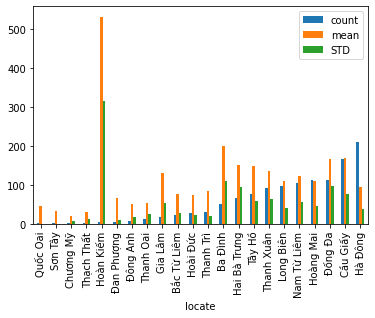

In [ ]:
count=dataframe.groupby('locate').size().rename('count')
mean= dataframe.groupby('locate').mean()['price'].rename('mean')
var = dataframe.groupby('locate').std()['price'].rename('STD')

# des =pd.merge(pd.merge(count,mean,on='locate'),var,on='locate')

des=pd.concat([count, mean,var], axis=1)
des=des.sort_values(by='count')
des.plot(kind="bar")
des

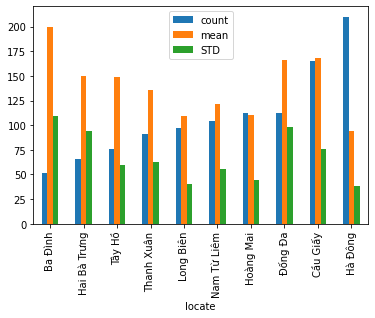

In [ ]:
des[des['count'] >50].plot(kind='bar')

In [ ]:
chose_locate=list(des[des['count'] >50].index)


In [ ]:
dataUse= dataframe[dataframe['locate'].isin(chose_locate)]
dataUse

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate
2,3,2021-08-10,"Ngõ 1 ngách 22 số 28, Đường Bùi Xương Trạch, P...",3.5,2.0,3.0,3.0,2.0,34.0,79.4,Hà Nội,Thanh Xuân
3,4,2021-08-10,"34 ngõ 637 Phố Trương Định, Phường Thịnh Liệt,...",3.5,3.0,5.0,3.0,4.0,35.0,94.3,Hà Nội,Hoàng Mai
4,6,2021-08-10,"Dự án Vinhomes Green Bay Mễ Trì, Đường Hoàng L...",7.5,13.0,4.0,4.0,5.0,93.5,278.1,Hà Nội,Nam Từ Liêm
5,9,2021-07-10,"Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ...",6.5,5.0,7.0,5.0,5.0,53.0,292.5,Hà Nội,Cầu Giấy
6,11,2021-06-10,"Đường Lê Trọng Tấn, Phường Dương Nội, Hà Đông,...",5.0,3.0,3.0,4.0,3.0,33.0,40.9,Hà Nội,Hà Đông
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1833,2021-09-10,"Đường Tư Đình, Phường Long Biên, Long Biên, Hà...",3.8,2.4,3.0,3.0,3.0,56.0,60.4,Hà Nội,Long Biên
1211,1835,2021-09-10,"Đường Định Công, Phường Định Công, Hoàng Mai, ...",5.0,4.0,2.0,2.0,2.0,80.0,65.0,Hà Nội,Hoàng Mai
1212,1836,2021-09-10,"Đường Định Công Thượng, Phường Định Công, Hoàn...",4.0,3.0,4.0,4.0,3.0,47.0,63.4,Hà Nội,Hoàng Mai
1213,1837,2021-09-10,"Phố Khúc Thừa Dụ, Phường Dịch Vọng, Cầu Giấy, ...",3.5,3.2,5.0,5.0,4.0,42.0,114.3,Hà Nội,Cầu Giấy


In [ ]:
# module chuyển đổi địa chỉ thành trọng số dựa trên mean price 
def module_changeData(df,CATEGORICAL_COLUMNS):
    df2 = df.copy()
   #  Modify Data to number to use
    for feature_name in CATEGORICAL_COLUMNS:
        lst= list(dict(df.groupby(feature_name).mean().sort_values('price')['price']).keys()) # lấy những giá trị duy nhất
        Dct={feature_name:lst,str(feature_name+"ID"):[int(i) for i in range(1,len(lst)+1)]} # Tạo từ điển với feature_name làm khóa và index làm giá trị
        DF=pd.DataFrame.from_dict(Dct)
        df2=pd.merge(df2,DF,on=feature_name) # join 2 bảng lại với nhau
    # df2 = df2[[column for column in df2 if df2[column].dtype != "object"]]
    return df2

In [ ]:
CATEGORICAL_COLUMNS=['locate']
dataUse =  module_changeData(dataUse,CATEGORICAL_COLUMNS)

In [ ]:
dataUse.sort_values('locateID')

,index,Date,địa chỉ,mặt tiền,đường vào,số tầng,số phòng ngủ,số phòng toilet,m^2,price,city,locate,locateID
542,679,2021-05-10,"Đường Lê Hồng Phong, Phường Hà Cầu, Hà Đông, H...",5.0,2.5,5.0,3.0,4.0,42.0,70.2,Hà Nội,Hà Đông,1
606,1150,2021-02-10,"Đường Quang Trung, Phường Đồng Mai, Hà Đông, H...",4.0,3.0,4.0,3.0,3.0,33.0,46.4,Hà Nội,Hà Đông,1
607,1158,2021-09-10,"Đường Mậu Lương, Phường Kiến Hưng, Hà Đông, Hà...",4.5,6.0,5.0,3.0,4.0,35.0,85.7,Hà Nội,Hà Đông,1
608,1204,2021-09-10,"Đường Mậu Lương, Phường Kiến Hưng, Hà Đông, Hà...",5.0,30.0,5.0,3.0,4.0,33.0,71.2,Hà Nội,Hà Đông,1
609,1216,2021-09-10,"Đường Văn Khê, Phường Phú La, Hà Đông, Hà Nội",4.5,42.0,5.0,4.0,9.0,90.0,155.6,Hà Nội,Hà Đông,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1224,2021-09-10,"Đường Vĩnh Phúc, Phường Vĩnh Phúc, Ba Đình, ...",6.0,2.5,5.0,4.0,3.0,42.0,128.6,Hà Nội,Ba Đình,10
820,1355,2021-09-10,"Phường Đội Cấn, Ba Đình, Hà Nội",4.6,2.0,6.0,3.0,6.0,30.0,143.3,Hà Nội,Ba Đình,10
821,1451,2021-09-10,"Đường Nguyễn Thái Học, Phường Giảng Võ, Ba Đ...",5.5,30.0,3.0,3.0,3.0,55.0,500.0,Hà Nội,Ba Đình,10
809,780,2021-09-10,"Đường Vĩnh Phúc, Phường Vĩnh Phúc, Ba Đình, ...",3.5,3.5,3.0,3.0,3.0,35.0,108.6,Hà Nội,Ba Đình,10


In [ ]:
dataUse.columns

Index(['index', 'Date', 'địa chỉ', 'mặt tiền', 'đường vào', 'số tầng',
       'số phòng  ngủ', 'số phòng toilet', 'm^2', 'price', 'city', 'locate',
       'locateID'],
      dtype='object')

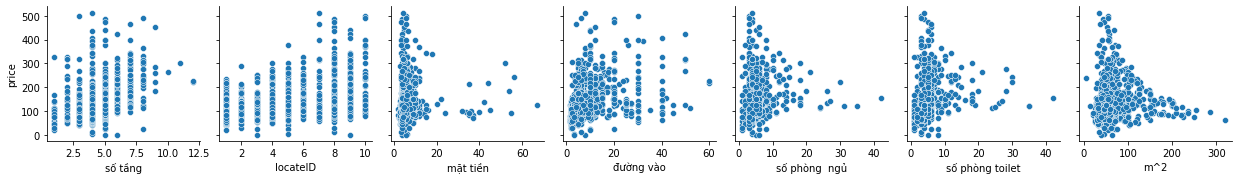

In [ ]:
sns.pairplot(x_vars=['số tầng','locateID','mặt tiền','đường vào','số phòng  ngủ','số phòng toilet','m^2'],y_vars=['price'],data=dataUse)

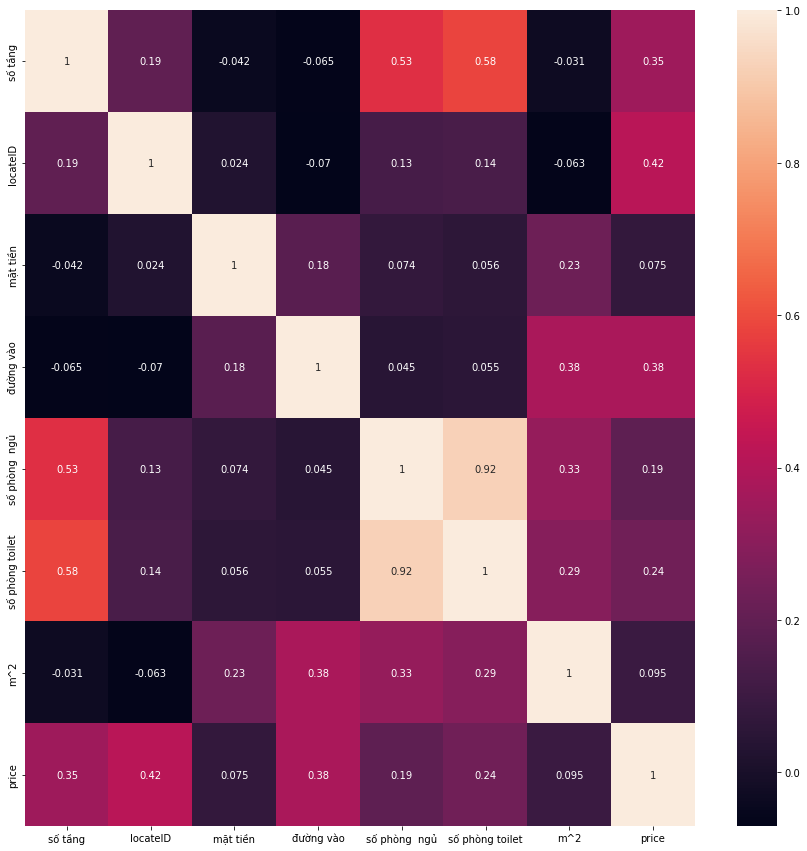

In [ ]:
# df1 = df.loc[:, df.columns != col]
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(dataUse[['số tầng','locateID','mặt tiền','đường vào','số phòng  ngủ','số phòng toilet','m^2','price']].corr(), annot=True)

In [ ]:
corr_Matrix = dataUse[['số tầng','locateID','mặt tiền','đường vào','số phòng  ngủ','số phòng toilet','m^2','price']].corr()
listFeature = list(corr_Matrix.nlargest(5, 'price')['price'].index)
listFeature

['price', 'locateID', 'đường vào', 'số tầng', 'số phòng toilet']

In [ ]:
dataUse = dataUse[listFeature]
dataUse.head()

,price,locateID,đường vào,số tầng,số phòng toilet
0,79.4,5,2.0,3.0,2.0
1,300.0,5,15.0,8.0,8.0
2,278.6,5,18.0,8.0,9.0
3,143.4,5,6.0,5.0,5.0
4,39.3,5,2.0,1.0,1.0


In [ ]:

# norm = np.linalg.norm(x_train)
# x_train=x_train/norm

In [ ]:
import random as rd
y_train = dataUse['price'].to_numpy()

xData=dataUse.drop(columns=['price'])
x_train =xData.to_numpy()
x_test = []
y_test = []

#Split data to train set and test set
for i in range(int(x_train.shape[0] * 0.2)):
  id = rd.randint(0, x_train.shape[0]-1)
  x_test.append(x_train[id])
  y_test.append(y_train[id])

  x_train = np.delete(x_train, id, axis = 0)
  y_train = np.delete(y_train, id)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print("Size of train",len(x_train))
print("Size of Test",len(x_test))

Size of train 868
Size of Test 217


# Build Linear Module

In [ ]:
# Error class
class error(): 
  def __init__(self, y_true, y_pre):
    self.y_true = y_true
    self.y_pre = y_pre
    self.len = len(y_true)

  def mean_abs_err(self):
    return np.sum(np.abs(self.y_true - self.y_pre)) / self.len

  def max_err(self):
    return np.max(self.y_true - self.y_pre)

  def r2_score(self):
    u = (self.y_true - self.y_pre) ** 2
    v = (self.y_true - np.average(self.y_true)) ** 2
    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))

  def explain_cor(self):
    y_diff_avg = np.average(self.y_true - self.y_pre, axis=0)
    u = np.average((self.y_true - self.y_pre - y_diff_avg) ** 2, axis=0)

    y_true_avg = np.average(self.y_true, axis=0)
    v = np.average((self.y_true - y_true_avg) ** 2, axis=0)

    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))
from sklearn.metrics import r2_score

In [ ]:
class Linear_regression():
  def __init__(self, iter, lr,landa=0):
    self.iter = iter
    self.lr = lr
    self.landa =landa
    self.hist = {"lossTrain":[],"lossTest":[],"accuTrain":[],"accuTest":[]}
  def update_weight(self, w):
    m = len(self.X)
    predictions = np.dot(self.X, w)
    error = self.y - predictions
    gradient = np.dot(-self.X.T,  error)
    gradient /= m
    gradient *= self.lr
    gradient += ((self.landa * w)/m)
    w -= gradient
    return w

  def cost_function(self,X,y):
    N = len(y)
    pred = np.dot(X, self.weights)
    sq_error = (pred - y)**2
    p =self.landa *(np.power(self.weights,2).sum())
    return 1.0/(2*N) * sq_error.sum() + (p/2*N) 

  def fit(self, Xc, yc,testData=None):
    self.X = Xc
    self.weights = np.zeros((Xc.shape[1], 1))
    self.y = yc.reshape(yc.shape[0], 1)
    for i in range(self.iter):
      self.hist["lossTrain"].append(self.cost_function(self.X,self.y))
      self.hist["accuTrain"].append(self.score(self.y, np.dot(self.X,self.weights)))
      if testData is not None:
        x_test,y_test = testData
        self.hist["lossTest"].append(self.cost_function(x_test,y_test))
        self.hist["accuTest"].append(self.score(y_test, np.dot(x_test,self.weights)))
      self.weights = self.update_weight(self.weights)

    return self.weights

  def lrtrain(self, df):
    self.preprocessing_data(df)
    return self.fit(self.x_train, self.y_train)

  def score(self,y_true,y_pre):
    u = (y_true - y_pre) ** 2
    v = (y_true - np.average(y_true)) ** 2
    r=np.corrcoef(y_pre,y_true, rowvar=False)[0][1]
    return np.average(1 - (u.sum(axis=0) / v.sum(axis=0)))
    # return r

In [ ]:
dataUse.drop(columns=['price']).columns

Index(['locateID', 'đường vào', 'số tầng', 'số phòng toilet'], dtype='object')

In [ ]:
epoch = 10000
model = Linear_regression(epoch, 0.003,0.01)
weights = model.fit(x_train,y_train,testData=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
weights
coeff_df = pd.DataFrame(weights,xData.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
số tầng,13.517551
locateID,9.072858
đường vào,3.550996
số phòng toilet,0.016092


[[1.         0.68490194]
 [0.68490194 1.        ]]


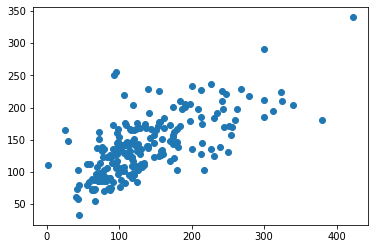

In [ ]:
predictions = np.dot(x_test,weights)
y_test = np.reshape(y_test,(len(y_test),1))
print(np.corrcoef(predictions,y_test, rowvar=False))
plt.scatter(y_test, predictions)


# Visualize accuracy

In [ ]:
hist = model.hist
# history of Score
scoreTrain = hist['accuTrain']
scoreTest = hist['accuTest']

# history of Loss
lossTrain = hist['lossTrain']
lossTest = hist['lossTest']

inter = len(lossTrain)


<Figure size 432x288 with 0 Axes>

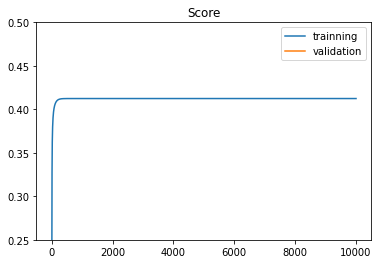

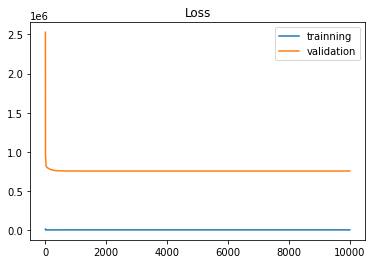

<Figure size 432x288 with 0 Axes>

In [ ]:
#score
plt.title("Score")
plt.plot(range(inter),scoreTrain)
plt.plot(range(inter),scoreTest)
plt.legend(["trainning","validation"])
plt.ylim([0.25,0.5])
plt.figure()

#Loss
plt.title("Loss")
plt.plot(range(inter),lossTrain)
plt.plot(range(inter),lossTest)
# plt.ylim([0,4000])
plt.legend(["trainning","validation"])
plt.figure()